# 리뷰 데이터 수집

In [25]:
# https://play.google.com/store/apps/details?id=com.cjoshppingphone&hl=ko-KR

In [26]:
import pandas as pd
from google_play_scraper import app
from google_play_scraper import Sort,reviews_all
reviews = reviews_all("com.cjoshppingphone",
                      sleep_milliseconds=0,
                      lang = "ko",
                      country = "KR",
                      sort = Sort.NEWEST,
                      count=50000)

In [27]:

# raw_df = pd.DataFrame(np.array(reviews),columns=["review"])
# raw_df =raw_df.join(pd.DataFrame(raw_df.pop("review").to_list()))
# df = raw_df.drop(['reviewId','userName','userImage','replyContent','repliedAt','reviewCreatedVersion','appVersion'],axis=1,inplace=False)
# df.head()
# raw_df.to_csv('./data/oliveyoung_raw.csv',index=False)
# df.to_csv('./data/oliveyoung_df.csv',index=False)

In [28]:
import numpy as np
def reviews_df(reviews,name):
    raw_df = pd.DataFrame(np.array(reviews),columns=["review"])
    raw_df =raw_df.join(pd.DataFrame(raw_df.pop("review").to_list()))
    df = raw_df.drop(['reviewId','userName','userImage','replyContent','repliedAt','reviewCreatedVersion','appVersion'],axis=1,inplace=False)
    df.head()
    raw_df.to_csv(f'./data/{name}_raw.csv',index=False)
    df.to_csv(f'./data/{name}_df.csv',index=False)
    return raw_df, df

In [29]:
raw,df = reviews_df(reviews,'cjonstyle_test')

In [30]:
df.sort_values('at',ascending=False)

,content,score,thumbsUpCount,at
15312,계속 실행 불가,1,0,2024-01-03 13:32:40
7081,빠른배송,5,0,2024-01-03 10:42:27
7078,배송 빠르고 주의사항 첨부까지 잘지켜줍니다,5,0,2024-01-02 23:35:58
19,"택배도 적정시기에 잘 보내주셨고, 포근하니 부러운 색상이라 맘에 들어요. 다만 좀 ...",4,0,2024-01-02 20:18:01
7083,좋아요,5,0,2024-01-02 18:20:36
...,...,...,...,...
14355,전보다예뻐지고 상품을. 찾기도 편해졌네요,5,0,2011-04-28 23:55:30
14358,업뎃하고 더 좋아졌어요♥특히 방송볼수있어서 너무 좋아요ㅎㅎ,5,0,2011-04-24 04:30:41
14356,이전 앱보다 더 산뜻해졌네요!,4,0,2011-04-23 09:58:07
14357,장바구니 오류! 주문삭제도 안되고 선택주문도 안되고.... 일단 장바구니에 담은건 ...,3,3,2011-03-22 22:07:57


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15704 entries, 0 to 15703
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        15585 non-null  object        
 1   score          15704 non-null  int64         
 2   thumbsUpCount  15704 non-null  int64         
 3   at             15704 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 490.9+ KB


In [32]:
df['year'] = df['at'].dt.strftime("%Y")
df

,content,score,thumbsUpCount,at,year
0,실용적인 제품이 많이 소개돼서 좋아요~근데 왠지 노출이 많이 되지 못하는 것 같아요...,5,175,2023-10-10 11:23:58,2023
1,그동안 블편함을 못느꼈었는데 최근에 너무 이상해요. 상품 클릭하면 상세화면 내용 안...,1,385,2023-08-12 23:14:26,2023
2,"분명히 앱을 실행한 건데도, 바로가기 적용이 안되어서 혜택 적용(vip즉시할인 등)...",3,1449,2018-10-10 22:04:05,2018
3,로그인 화면에서 튕기면서 메인페이지로 넘어갑니다. 로그인 자체가 불가능해서 물건 주...,1,699,2022-07-07 23:40:08,2022
4,"앱에서 상품 볼때 로딩이 너무 느려요. 썸네일 이미지랑 텍스트 로딩이 너무 느리고,...",1,693,2022-09-07 15:02:18,2022
...,...,...,...,...,...
15699,좋은것같아요,5,0,2014-11-19 11:31:57,2014
15700,賽海,5,0,2022-01-01 08:41:28,2022
15701,지하철노선,5,1,2015-07-06 14:01:04,2015
15702,...,5,0,2015-08-17 14:11:41,2015


In [33]:
df.loc[:][df['year']==2022]

,content,score,thumbsUpCount,at,year


# 토큰화

In [34]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [35]:
df['content'].isnull().sum()

119

In [36]:
print(df.info())
print()
df.dropna(subset='content',axis=0,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15704 entries, 0 to 15703
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        15585 non-null  object        
 1   score          15704 non-null  int64         
 2   thumbsUpCount  15704 non-null  int64         
 3   at             15704 non-null  datetime64[ns]
 4   year           15704 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 613.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 15585 entries, 0 to 15702
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        15585 non-null  object        
 1   score          15585 non-null  int64         
 2   thumbsUpCount  15585 non-null  int64         
 3   at             15585 non-null  datetime64[ns]
 4   year           15585 non-null  object       

In [37]:
def tokenize(dataFrame):
    okt = Okt()
    
    dataFrame['morphs'] = [okt.morphs(content) for content in dataFrame['content']]
    return dataFrame

def remove_stop_words(dataFrame):
    text = '~ ~~ ~~~ ~~~~ ~~~~~ ^ ^^ ! !! ㅜㅜ . .. , ,, 가 도 고 이고 이나 요 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 입니다' 
    stop_words = text.split(" ")
    stop_words_set = set(stop_words)
    dataFrame['morphs'] = [[word for word in morphs if word not in stop_words_set] for morphs in dataFrame['morphs']]
    return dataFrame

def dtm_maker(dataFrame):
    cv = CountVectorizer()
    dataFrame['morphs'] = dataFrame['morphs'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    dtm = cv.fit_transform(dataFrame['morphs'])
    return dtm

def tf_idf_maker(dtm):
    trans = TfidfTransformer()
    tf_idf = trans.fit_transform(dtm)
    return tf_idf

def data_preprocessing(dataFrame):
    dataframe = tokenize(dataFrame)
    dataframe = remove_stop_words(dataFrame)
    dtm = dtm_maker(dataFrame)
    
    return dataFrame,dtm


In [38]:
tokenized = tokenize(df)

In [39]:
dataframe, dtm = data_preprocessing(df)

In [40]:
dtm

<15585x16370 sparse matrix of type '<class 'numpy.int64'>'
	with 97496 stored elements in Compressed Sparse Row format>

In [41]:
tf_idf = tf_idf_maker(dtm)
tf_idf

<15585x16370 sparse matrix of type '<class 'numpy.float64'>'
	with 97496 stored elements in Compressed Sparse Row format>

# 단어구름

In [42]:
def col_to_doc(col):
    combined_list = col.tolist()
    combined_string = col.str.cat(sep=',')

    return combined_string

In [43]:
doc = col_to_doc(df['morphs'])
doc

'실용 제품 많이 소개 돼서 좋아요 근데 왠지 노출 많이 되지 못 같아요 채널 많이 넘겨야 만나지는 느낌 TV 보면서 모바일 구매 라서 주어지는 서비스 는 제품 비해 너무 제한 이라는 별로 혜택 느껴지지 않아요,그동안 블편함 못 느꼈었는데 최근 너무 이상해요 상품 클릭 상세 화면 내용 뜨는 빈번 장바구니 넣기 버튼 눌러도 먹통 많아요 앱 진짜 버벅댄다는 느낌 많이 받습니다 결제 빨리 넘어갈 많구요 업데이트 안해 서 건가 싶어서 계속 체크 해보는데 아니고 엄청 답답하네요 해결 해주세요,분명히 앱 실행 건데 바로가기 적용 안되어서 혜택 적용 ( vip 할인 ) 안되는 계속 발생 앱 재실 행해 강제 종료 재실 행해 폰 재부팅 마찬가지 앱 자체 삭제 재 설치 해야만 합니다 .( 해당 오류 수십 겪다 보니 ... 타 사이트 광고 배너 클릭 해 씨제이 몰 사이트 실행 했다가 앱 실행 로는 계속 에러 는 같더군요 기 기 분명 아니에요 예전 기기 사용 시 에도 동일한 계속 있었습니다 타 사이트 이용 하다가 실수 로라 씨제이 몰의 광고 배너 클릭 꼭 오류 발생 걸 확인 앱 재 설치 해왔습니다 정말 불편하고 짜증납니다 앱 개발 팀 꼭 검수 해보고 수정 해주셨으면 좋겠네요 .),로그인 화면 튕기면 서 메인 페이지 넘어갑니다 로그인 자체 불가능해서 물건 주문 못 합니다 어플리케이션 버그 발견 됐다며 폰 앱 강제 종료 시키고 나서 재 접속 했는데도 현상 발생 최근 업데이트 이후 현상 일어난 같은데 버그 수정 하셔 야할듯,앱 상품 볼때 로딩 너무 느려요 썸네일 이미지 랑 텍스트 로딩 너무 느리고 한참 기다려도 이미지 아예 뜨거나 텍스트 없이 나오기도 스 크롤 내릴 첫 두어 번은 괜찮은 듯 리다 터져서 PC 홈페이지 접속 해서 상품 봅니다 한두 아닙니다 개발자 랑 관리자 는 본인 폰 앱 확인 해보는지 ?,꽤 상당 기간 이미지 파일 깨져서 나오지가 상품 상세 페이지 보이지 공백 보입니다 방금 앱 업데이트 했는데도 마찬가지 특히 패션 상품 은 옷 핏 상세 치수 소재 확인 해야 하는데 매우 

In [44]:
def build_wto_bow_cws(document):
    okt = Okt()
    document = document.replace('.','')                
    tokenized_document = okt.morphs(document)      
    
    # BoW와 단어집합 만들기 - 객체 선언
    bow = []                                          
    word_to_index = {}                                  
    word_counts = {}
    # Bow와 단어집합 만들기
    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            bow.insert(len(word_to_index) - 1, 1)
        else:                                           
            index = word_to_index.get(word)
            bow[index] += 1
    word_counts = {key:bow[idx] for idx,key in enumerate(word_to_index)}
    
    return word_to_index, bow, word_counts

In [45]:
word_to_index, bow, word_counts = build_wto_bow_cws(doc)


In [46]:
# word_counts={key:bow[idx] for idx,key in enumerate(word_to_index)}
word_counts


{'실용': 22,
 '제품': 769,
 '많이': 446,
 '소개': 57,
 '돼서': 21,
 '좋아요': 3260,
 '근데': 40,
 '왠지': 10,
 '노출': 7,
 '되지': 22,
 '못': 329,
 '같아요': 479,
 '채널': 20,
 '넘겨야': 1,
 '만나지는': 1,
 '느낌': 122,
 'TV': 19,
 '보면서': 32,
 '모바일': 453,
 '구매': 1077,
 '라서': 78,
 '주어지는': 2,
 '서비스': 79,
 '는': 651,
 '비해': 46,
 '너무': 1372,
 '제한': 8,
 '이라는': 16,
 '별로': 82,
 '혜택': 296,
 '느껴지지': 1,
 '않아요': 50,
 ',': 14232,
 '그동안': 15,
 '블편함': 1,
 '느꼈었는데': 1,
 '최근': 26,
 '이상해요': 3,
 '상품': 1340,
 '클릭': 67,
 '상세': 52,
 '화면': 250,
 '내용': 18,
 '뜨는': 13,
 '빈번': 3,
 '장바구니': 42,
 '넣기': 3,
 '버튼': 32,
 '눌러도': 17,
 '먹통': 22,
 '많아요': 60,
 '앱': 1566,
 '진짜': 209,
 '버벅댄다는': 1,
 '받습니다': 1,
 '결제': 218,
 '빨리': 148,
 '넘어갈': 4,
 '많구요': 6,
 '업데이트': 277,
 '안해': 17,
 '서': 255,
 '건가': 29,
 '싶어서': 9,
 '계속': 424,
 '체크': 29,
 '해보는데': 5,
 '아니고': 48,
 '엄청': 81,
 '답답하네요': 8,
 '해결': 51,
 '해주세요': 122,
 '분명히': 5,
 '실행': 106,
 '건데': 8,
 '바로가기': 20,
 '적용': 68,
 '안되어서': 7,
 '(': 57,
 'vip': 18,
 '할인': 372,
 ')': 42,
 '안되는': 50,
 '발생': 13,
 '재실': 2,
 '행해': 2,
 '강

## 이미지화

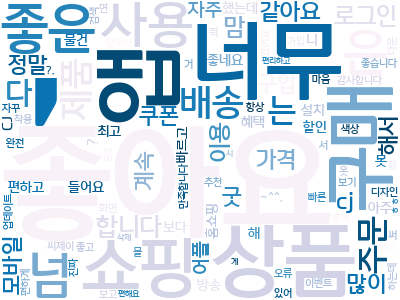

In [47]:
from wordcloud import WordCloud

wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
cloud = wc.fit_words(word_counts)
cloud.to_image()